In [1]:
'''
Multiple (8) base and grid searched classification models were run on
1.	selected features
2.	all the features provided
'''

'\nMultiple (8) base and grid searched classification models were run on\n1.\tselected features\n2.\tall the features provided\n'

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500)      # to display 500 rows


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier              
                
from six import StringIO
from sklearn.tree import export_graphviz

plt.rc("figure", figsize=(9, 7))

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Defining functions for various tasks - EDA, cleaning, feature selection, PCA, modelling, Gridsearch, model evaluation

In [2]:
def load_file(file):
    df = pd.read_csv(file, delimiter=",", header=None)
    df = df.replace('?',np.nan) #,inplace=True) 
    
    print(df.shape)
        
    return df

### Loading file

In [3]:
file_path = "diabetic_data.csv" 

DF = pd.read_csv(file_path)
DF.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
def Perform_EDA(df, target):
        
        print('Printing the column names: ')
        print('------------')
        print(df.columns)
        print(' ')
        
        print('Size of the DataFrame: ')
        print('------------')
        print('df.shape: ')
        print(df.shape)
        print(' ')
        
        print('Data types: ')
        print('------------')
        print('df.info: ')
        print(df.info())
        print(' ')
        
        print('Printing value counts for each variable: ')
        print('------------')
        print(df.nunique())
        print(' ')
        
        
        print('Printing outcomes of target column: ')
        print('------------')
        print(df[target].value_counts())
        print(' ')
        
        # Checking for Nulls
        print('Checking for Nulls')
        print('--------------')
        print(df.isnull().sum())
        print('--------------')
        print(' ')
    
        # Identifying outliers
        #print('Data Statistics to identify skewness and outliers etc: ')
        #print('------------')
        #print('df.describe')
        #print(df.describe(include='all')) 
        #print(' ')
        
        return df

### Selecting the 'target' feature and doing initial Exploratory Data Analysis

In [5]:
target = "readmitted"
DF = Perform_EDA(DF, target)

Printing the column names: 
------------
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
 
Size of the DataFrame: 
--

In [6]:
#Adjusting the 'target' variable. Assigning >30 and <30 as 1 which means 
#'readmission', NO as 0

def targetVariableAdjustments(df, target):
    
    # Making the target variable binary, 0 when its NO and 1 otherwise 
    df[target] = df[target].replace(["NO"],[0])
    df[target] = df[target].replace([">30","<30"],[1, 1])
    
    return df

#### Adjusting the 'target' variable. Assigning >30 and <30 as 1 which means 'readmission', NO as 0.

In [7]:
DF = targetVariableAdjustments(DF, target)
DF.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1


### Cleaning

In [8]:
# Understanding data

cols_val_cnts = ["weight", "age", "race"]
#'max_glu_serum', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride']
for cols in cols_val_cnts:
    print(DF[cols].value_counts())

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [9]:
def DataCleaning(df):
    
    # ? to nans
        # Diagnosis Nan to 0 ?  - hmmm
        
        #drop weights = 96K unknown


        # #removing invalid/unknown entries for gender


        # Dropping payer_code & medical_specialty features as they do not add medical
        # value in prediction

        # Dropping encounter_id and patient_nbr,  admission_type_id (?)
        
        # medical_specialty  only 50% present so drop

        # variables (drugs named citoglipton and examide), all records have the same value.
        # Dropping citoglipton and examide


        ''' admission_type_id
        Emergency
        Urgent
        Elective
        Newborn
        Not Available
        NULL
        Trauma Center
        Not Mapped
        '''
        '''
        Steps:
        After close analysis of the features (esp Object type)

       
                
        3. Deleting Nulls (Not imputing as number of nulls are very small)

        4. drop duplicates, if any
        
        5. Removing outliers
            chol, oldpeak and thalac seems to have outliers. 
            limiting to within Q1 - 1.5IQR and Q3 + 1.5IQR range
        '''

        #1. 
        df = df.replace('?',np.nan) 
        
        #2. 
        df=df[df['gender']!='Unknown/Invalid']
        
        
       
        #4 .
        df['gender'][df['gender'] == 'Unknown/Invalid']
        
        #5. Dropping duplicates, if any
        df.drop_duplicates(inplace = True)
       
         #6. Storing  only the 1st encounter for patients with multiple encounters
        
        df.sort_values("patient_nbr", inplace=True) 
        df.drop_duplicates(subset=['patient_nbr'], inplace=True, keep = 'first')
    
       #3. dropping unwanted features   

        df.drop(['weight','encounter_id', 'patient_nbr', 'discharge_disposition_id',
                 'payer_code', 'admission_source_id','admission_type_id',
                'citoglipton', 'examide', 'medical_specialty' ],axis=1,inplace=True)
            # 'medical_specialty'
            
            # 6. Removing outliers
       # ...... seems to have outliers
    
       # remove negative numbers from diag_1	diag_2	diag_3 - TODO
        ''' 
        Q1 = np.percentile(df, 25, interpolation = 'midpoint')
        Q3 = np.percentile(df, 75, interpolation = 'midpoint') 
        
        IQR = Q3-Q1 # Interquartile Range
        
        lower_limits = Q1 - (IQR * 1.5)
        upper_limits = Q3 + (IQR * 1.5)
        
        df = df[~((df >= upper_limits) & (df <= lower_limits))]#.index.tolist()  
        '''
        
      # Checking for Nulls
        print('Checking for Nulls')
        print('--------------')
        print(df.isnull().sum())
        print('--------------')
        print(' ')
        
        
      # 6. Dropping Nans (Not imputing with mean, mode etc at this moment)
        df.dropna(inplace=True)
        
         # Checking for Nulls
        print('Again checking for Nulls')
        print('--------------')
        print(df.isnull().sum())
        print('--------------')
        print(' ')

        print('info: ')
        print(df.info())
        print('--------------')
        print(' ')

        print('shape: ')
        print(df.shape)

        return df

In [10]:
DF = DataCleaning(DF)
DF.head(2)

Checking for Nulls
--------------
race                        1908
gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        13
diag_2                       291
diag_3                      1183
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitaz

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4780,Caucasian,Female,[50-60),3,31,1,14,0,0,1,998,41,250,5,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,1
5827,Caucasian,Female,[50-60),2,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0


### Lookups for grouping the diagnosis based on ICD codes

In [11]:
import re

def transformFunc(value):
    value = re.sub("V[0-9]*", "1000", value) # V, assigning 1000 to V's
    value = re.sub("E[0-9]*", "2000", value) # E, assigning 2000 to V's 
    value = re.sub('NaN', "-1", value) # Nan 
    return value
    
def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==780 or value==781 or value==784 or (value>=790 and value<=799) :
        category = 'Neoplasms'
    elif(value>=240 and value<=279) and value!=250 :
        category = 'Neoplasms'
    elif value>=680 and value<=709 or value==782:
        category = 'Neoplasms'
    elif value>=1 and value<=139:
        category = 'Neoplasms'
    elif value>=290 and value<=319:
        category = 'Neoplasms'
    elif value==-1:
        category = np.nan
    else :
        category = 'Other'  # Any E-V

    return category
     

In [12]:
# Categorizing diagnosis based on ICD9 codes
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    DF[col] = DF[col].apply(transformFunc)
    DF[col] = DF[col].astype(float)
    DF[col] = DF[col].apply(transformCategory)

DF.dropna(inplace=True)
DF.head(2)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4780,Caucasian,Female,[50-60),3,31,1,14,0,0,1,Injury,Neoplasms,Diabetes,5,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,1
5827,Caucasian,Female,[50-60),2,49,1,11,0,0,0,Musculoskeletal,Neoplasms,Diabetes,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0


In [13]:
#DF.diag_3.isnull().sum()

In [14]:
# Box plots and Bar plots
def plotting(df, target):

    # Separating Categorical and continuous features
    
    categorical_features = []
    continuous_features = []
    
    for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else: 
            continuous_features.append(col) 
            
    continuous_features.remove(target)  # taking out target feature from cont list
    
    plt.figure(figsize=(15, 15))

    # Categorical Features plotting
    
    #df[categorical_features].plot(kind='bar', subplots=True, layout=(2,8),
          #  sharex=False,sharey=False, figsize=(20, 10) ); 
    
    ''' for i, column in enumerate(categorical_features, 1):
        plt.subplot(2, 4, i)


        df[df[target] == 0][column].hist(bins=35, color='green', label='Disease_diagnosed = NO', alpha=0.5)
        df[df[target] == 1][column].hist(bins=35, color='red', label='Disease_diagnosed = YES', alpha=0.5)
        plt.legend()
        plt.xlabel(column)
    '''
    # Continuous Features plotting
    
    df[continuous_features].plot(kind='box', subplots=True, layout=(2,7),
    sharex=False,sharey=False, figsize=(20, 10) ); 
    
    return categorical_features, continuous_features

#### Plotting (Box and Bar plots) the features to undestand their distribution and any outliers

<Figure size 1080x1080 with 0 Axes>

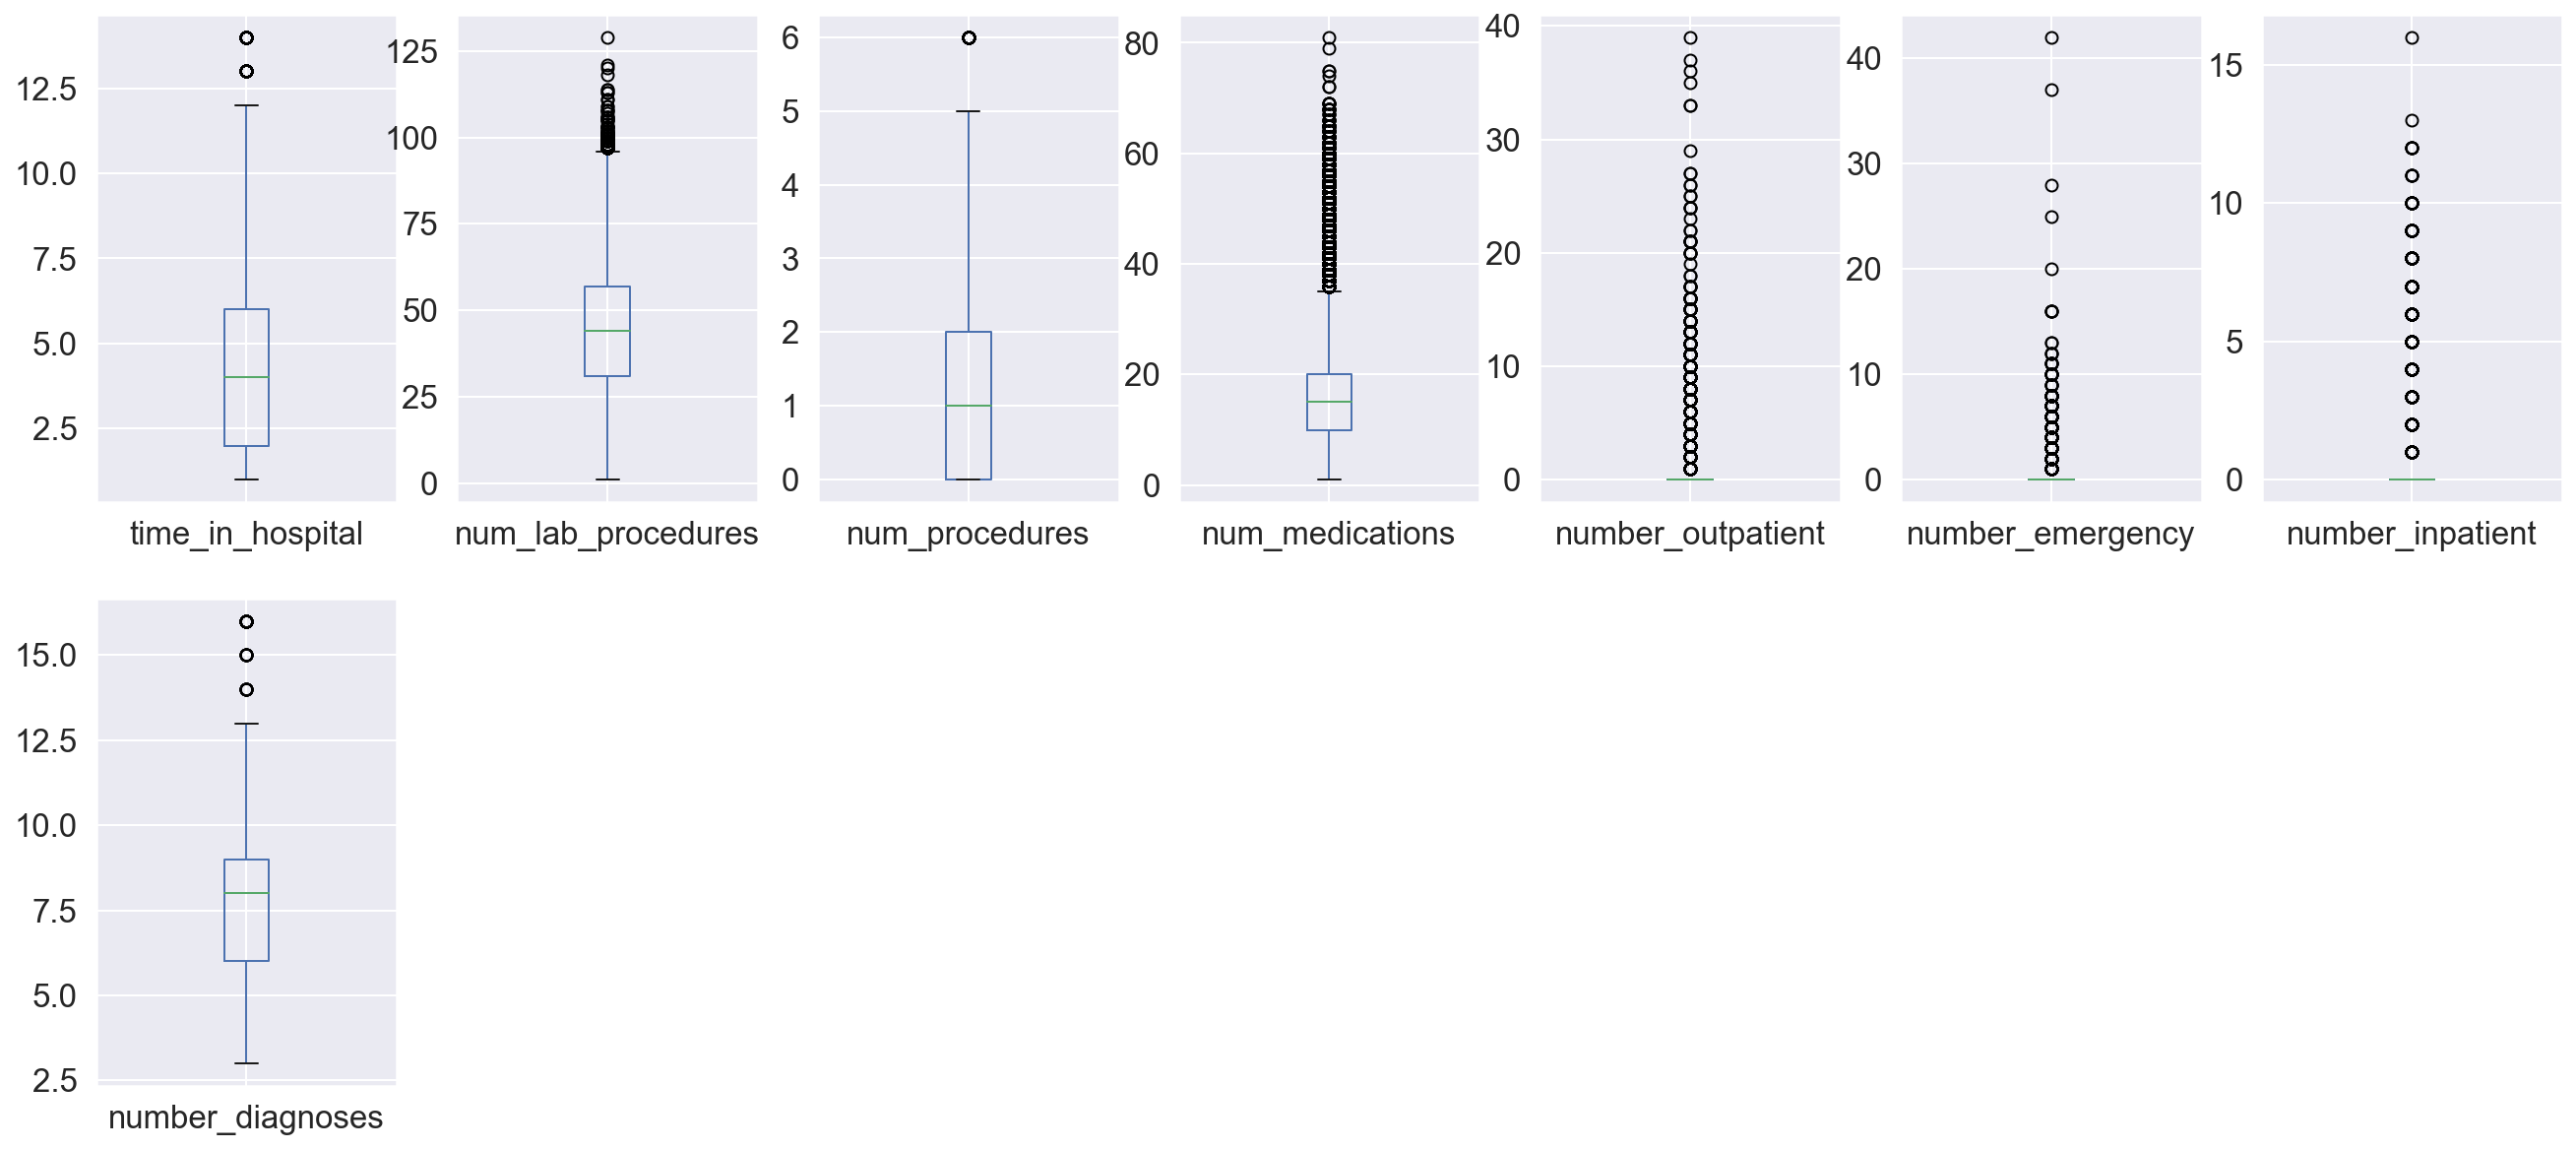

In [15]:
categorical_features, continuous_features = plotting(DF, target)

 ### Dummifying features

In [16]:
def dummifying(df, categorical_features):    
    #Age and race
        #Glucose serum test result : “>200,” “>300,” “normal,” and “none” if not measured
        #    A1c test result: 8, 7, normal, none (not measured) 
         #   Change of medications: “change” and “no change”
         #   Diabetes medications : 
        # and other 24 medical features
 
        
    df_dummification = pd.get_dummies(df, columns=['gender', 'max_glu_serum', 'A1Cresult', 
                                     'change', 'diabetesMed',
                                      'metformin', 'repaglinide', 'nateglinide', 
                                      'chlorpropamide', 'glimepiride', 'acetohexamide',
                                      'glipizide', 'glyburide', 'tolbutamide', 
                                      'pioglitazone', 'rosiglitazone', 'acarbose',
                                      'miglitol', 'troglitazone', 'tolazamide',  
                                      'insulin', 'glyburide-metformin', 
                                      'glipizide-metformin', 'glimepiride-pioglitazone', 
                                      'metformin-rosiglitazone','metformin-pioglitazone'], drop_first = True)
    
    #'gender', 'admission_type_id', 'discharge_disposition_id',
        #                              'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'
    
    # we wont drop 1st in race as in race, you cannot determine another based on standard deviation
    df_dummification = pd.get_dummies(df_dummification, columns=['race', 'age', 'diag_1','diag_2','diag_3'])
    

    #df_dummification.drop(['race', 'age'], inplace=True, axis=1) # Dropping original 'race' & 'age' feature

        
    print('shape: ')
    print(df_dummification.shape) 
        
    return df_dummification

In [17]:
df = dummifying(DF, categorical_features) # Note: df is dummified version of DF
df.head(2)

shape: 
(68432, 105)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,gender_Male,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,diabetesMed_Yes,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory
4780,3,31,1,14,0,0,1,5,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
5827,2,49,1,11,0,0,0,3,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [18]:
def DataVisualizations(df, target, categorical_features, continuous_features):
    
    # Plot distributions
       # 1. numerical_features = histogram
       # 2. pair plots
    
    # 1. Histograms
        
    #plt.figure(figsize=(15, 15))
    
    '''  for i, column in enumerate(continuous_features, 1):
        plt.subplot(2, 3, i)
        df[df[target] == 0][column].hist(bins=35, color='green', label='Disease->No', alpha=0.6)
        df[df[target] == 1][column].hist(bins=35, color='red', label='Disease->Yes', alpha=0.6)
        plt.legend()
        plt.xlabel(column)
        plt.show()

    '''
    # 2. Visualizing the relationship between features (Hue for Outcome)

    sns.pairplot(data=df, vars=list(df.select_dtypes([np.number]).columns),
                       hue=target, height=3)
    #plt.show()
    

In [19]:
#DataVisualizations(df, target, categorical_features, continuous_features)

In [20]:
def TrainTestSplit_Standardization(df, target, test_size):

        # Features 
        y = df[target]
        X = df[df.columns.difference([target])] # All columns excpet the target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                            shuffle=True, stratify=y) 
        print(X_train.shape)
        print(y_train.shape)
        print(X_test.shape)
        print(y_test.shape)
        
        # Preserving for future use (bias evaluation)
        
        #X_train_orig, X_test_orig, y_train_orig, y_test_orig = X_train, X_test, y_train, y_test

        # Standardize the data

        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
        
        return X_train, X_test, y_train, y_test

In [21]:
test_size = 0.2 # 80:20 split
X_train, X_test, y_train, y_test = TrainTestSplit_Standardization(df, target, test_size)

(54745, 104)
(54745,)
(13687, 104)
(13687,)


In [22]:
def featureSelection(df, target, X_train, y_train):
    
    # Using the following measures to identify best features
    
    # 1. Correlation
    # 2. corr wrt target
    # 3. SelectKBest 
    # 4. VIF - to identify multicolinearity
    
    
    # 1. Correlation
    
        limit = 0.5

        print('Plotting highly correlated features')
        print('------------')
        
        ''' corr = df.corr()

        fig, ax = plt.subplots(figsize=(20,12))
        matrix = np.triu(corr)
        ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

        plt.show()
        
        corr = df.corr()

        kot = corr[corr>=.15]
        plt.figure(figsize=(12,8))
        sns.heatmap(kot, cmap="Greens")
        plt.show()
        ''' 
        corr = df.corr()
        filteredDf = corr[((corr >= limit) | (corr <= (-1*limit))) & (corr !=1.000)]
        plt.figure(figsize=(80, 40))
        sns.heatmap(filteredDf, annot=True, cmap="Reds")
        plt.show()
          
     # 2.
    
        corr1 = df.corr()[target][:] 
        corr_target = corr1.sort_values(ascending=False)
        corr_target_df=pd.DataFrame(corr_target)
        print(' ')
        print('Plotting Correlation of features wrt target')
        print('------------')
        print(corr_target_df)
        
        
      #3. # Selecting highly correlted features (to drop)
        corr_matrix = corr.abs() # df.corr().abs()

        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

        # Find index of feature columns with correlation greater than 0.5
        to_drop = [column for column in upper.columns if any(upper[column] > limit)]
        print(' ')
        print('Highly co-related features')
        print(to_drop)
        print('------------')
        
     # 3. selecting best features
        #from sklearn.feature_selection import SelectKBest, chi2, f_classif
        
        #X = df[df.columns.difference([target])] # All columns excpet the target
        
        print(' ')
        print('Plotting K-best features')
        print('------------')
        
        selector = SelectKBest(score_func=f_classif, k='all')# chi2  f_classif
        fit = selector.fit(X_train, y_train)
        scores = -np.log10(fit.pvalues_)
        scores /= scores.max()
        
        #X_indices = np.arange(X_train.shape[-1])
        
        #plt.bar(X_indices - .45, scores, width=.2,
         #       label=r'Score ($-Log(p_{value})$)')
    
        df_pvalues = pd.DataFrame(fit.pvalues_)
        df_scores = pd.DataFrame(fit.scores_)
        df_columns = pd.DataFrame(X_train.columns)
        
        # concatenate dataframes
        feature_scores = pd.concat([df_columns, df_scores, df_pvalues],axis=1)
        feature_scores.columns = ['Feature_Name','Score', 'p-values']  # name output columns
        print(feature_scores.nlargest(70,'Score'))  # 68 features are significant
        
            
    # 4. VIF
        print(' ')
        print('Variation Inflation Factor')
        print('------------')
        
        #from statsmodels.stats.outliers_influence import variance_inflation_factor
              
        vif = pd.DataFrame()
        vif["Features"] = df.columns
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        print(vif.sort_values(by='VIF', ascending=False)) 
        
        # Accept features whose VIF value is < 10
        

Plotting highly correlated features
------------


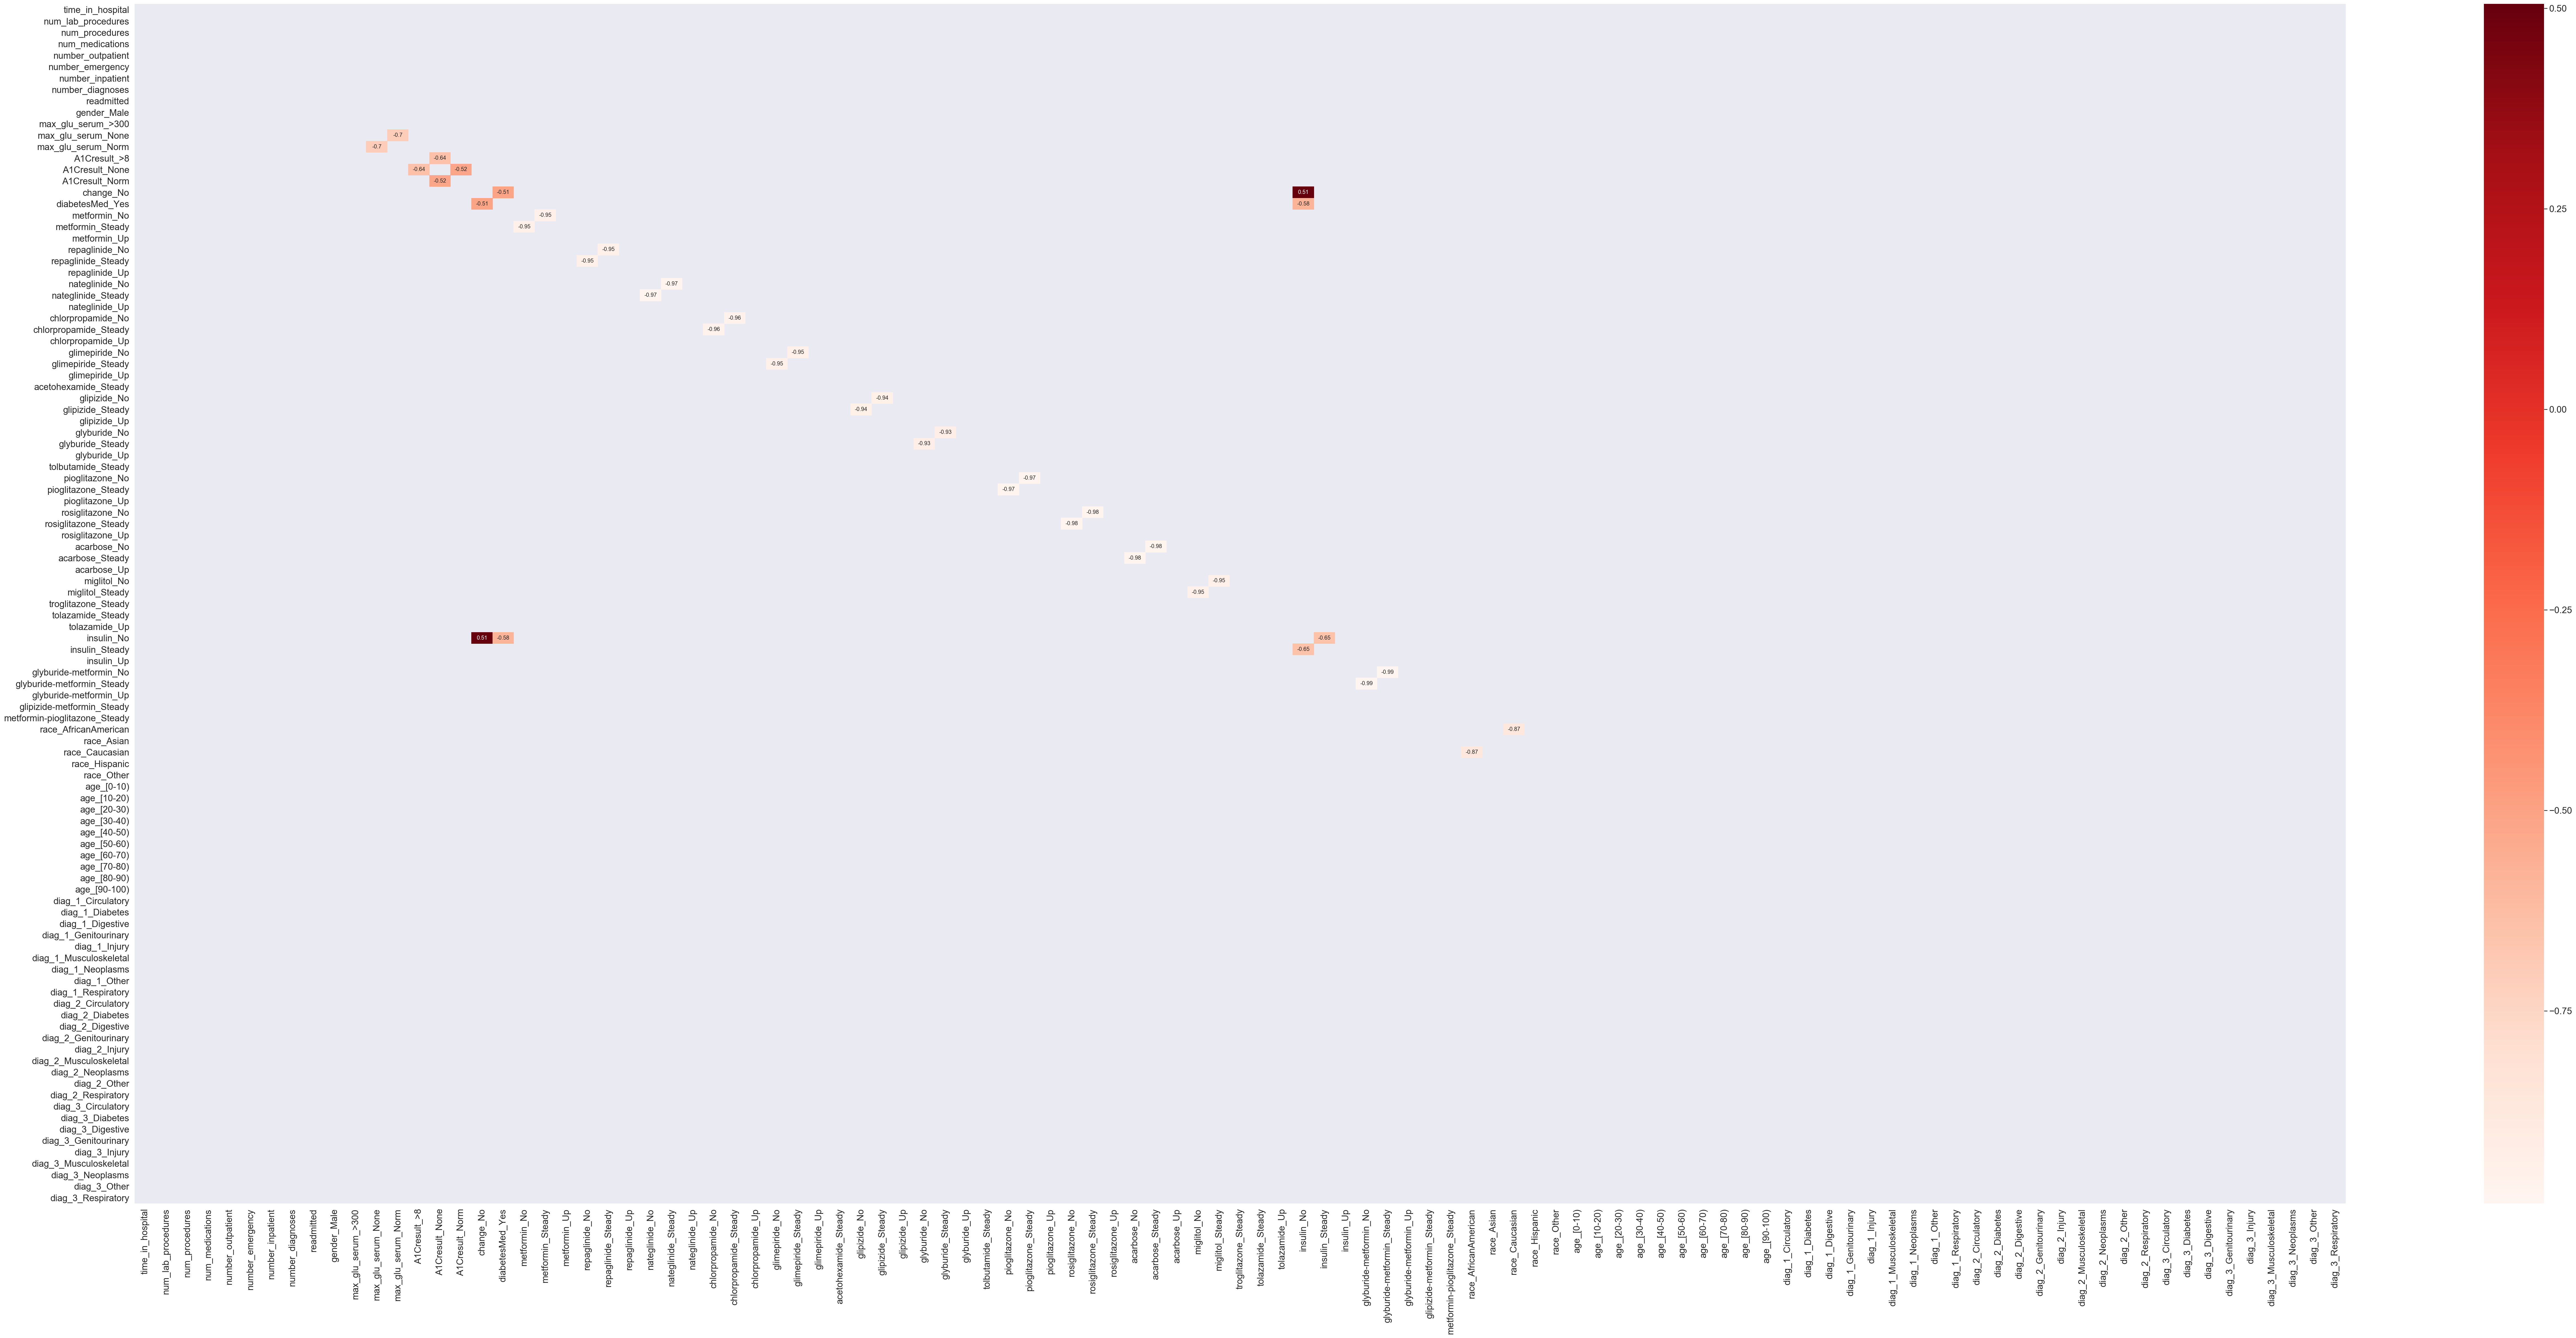

 
Plotting Correlation of features wrt target
------------
                               readmitted
readmitted                       1.000000
number_inpatient                 0.208893
number_diagnoses                 0.102587
number_emergency                 0.090332
number_outpatient                0.075978
num_lab_procedures               0.062518
diabetesMed_Yes                  0.059911
time_in_hospital                 0.050371
age_[70-80)                      0.038658
num_medications                  0.037146
race_Caucasian                   0.032995
age_[80-90)                      0.026110
diag_2_Circulatory               0.024190
glipizide_Steady                 0.022701
repaglinide_Steady               0.022489
diag_1_Circulatory               0.021966
rosiglitazone_Steady             0.021168
diag_3_Circulatory               0.020138
insulin_Up                       0.019364
pioglitazone_Steady              0.018928
metformin_No                     0.017496
diag_3_Genitourin

                          Features         VIF
104             diag_3_Respiratory         inf
72                     age_[40-50)         inf
94                    diag_2_Other         inf
93                diag_2_Neoplasms         inf
92          diag_2_Musculoskeletal         inf
91                   diag_2_Injury         inf
90            diag_2_Genitourinary         inf
63            race_AfricanAmerican         inf
64                      race_Asian         inf
65                  race_Caucasian         inf
66                   race_Hispanic         inf
67                      race_Other         inf
68                      age_[0-10)         inf
69                     age_[10-20)         inf
70                     age_[20-30)         inf
71                     age_[30-40)         inf
73                     age_[50-60)         inf
95              diag_2_Respiratory         inf
74                     age_[60-70)         inf
75                     age_[70-80)         inf
76           

In [35]:
featureSelection(df, target, X_train, y_train)

### Calculating odd ratios of diagnosis group and test result

In [36]:
#DF.A1Cresult.value_counts()
gp_total = DF.groupby(['diag_1', 'A1Cresult', 'max_glu_serum'])[['readmitted']].count()#.unstack()
gp_readmitted = DF.groupby(['diag_1', 'A1Cresult', 'max_glu_serum'])[['readmitted']].sum()#.unstack()

(gp_readmitted/gp_total)*100


readmitted
diag_1          A1Cresult max_glu_serum            
Circulatory     >7        >200            60.000000
                          >300            75.000000
                          None            32.352941
                          Norm            50.000000
                >8        >200            58.333333
                          >300            60.000000
                          None            35.831382
                          Norm            63.636364
                None      >200            30.081301
                          >300            37.984496
                          None            35.396932
                          Norm            31.084337
                Norm      >200           100.000000
                          None            32.757131
                          Norm            33.333333
Diabetes        >8        >300             0.000000
                          None            19.565217
                None      >200           100.000000
                          >300            12.500000
                          None            15.189873
                Norm      None             8.695652
Digestive       >7        >200           100.000000
                          None            33.165829
                          Norm            33.333333
                >8        >200            33.333333
                          >300            60.000000
                          None            34.294872
                          Norm            25.000000
                None      >200            32.075472
                          >300            35.000000
                          None            32.655411
                          Norm            28.272251
                Norm      >200           100.000000
                          None            33.818182
                          Norm            66.666667
Genitourinary   >7        >300             0.000000
                          None            33.576642
                >8        >200            66.666667
                          >300            50.000000
                          None            30.188679
                          Norm           100.000000
                None      >200            37.500000
                          >300            21.428571
                          None            31.133429
                          Norm            39.743590
                Norm      >200             0.000000
                          None            32.413793
Injury          >7        >200             0.000000
                          None            30.578512
                          Norm             0.000000
                >8        >200           100.000000
                          >300             0.000000
                          None            33.673469
                None      >200            28.301887
                          >300            23.076923
                          None            33.316365
                          Norm            28.828829
                Norm      >200             0.000000
                          None            23.394495
                          Norm            50.000000
Musculoskeletal >7        None            21.739130
                          Norm           100.000000
                >8        >200            66.666667
                          >300             0.000000
                          None            43.181818
                          Norm           100.000000
                None      >200            26.923077
                          >300            33.333333
                          None            30.434783
                          Norm            31.645570
                Norm      None            26.119403
                          Norm             0.000000
Neoplasms       >7        >200            33.333333
                          >300           100.000000
                          None            33.441558
                          Norm       

In [23]:
# Feature selection based on provided features to consider

def selectedFeatures(X_train, y_train, X_test, y_test):
 # dropping  fbs, age, sex, chol, resting_bp, restecg
    
    X_train_sltd = X_train[['diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
                        'diag_1_Genitourinary','diag_1_Injury','diag_1_Musculoskeletal',
                        'diag_1_Neoplasms','diag_1_Other','diag_1_Respiratory','diag_2_Circulatory',
                        'diag_2_Diabetes', 'diag_2_Digestive','diag_2_Genitourinary',
                        'diag_2_Injury','diag_2_Musculoskeletal','diag_2_Neoplasms',
                        'diag_2_Other','diag_2_Respiratory','diag_3_Circulatory',
                        'diag_3_Diabetes','diag_3_Digestive','diag_3_Genitourinary',
                        'diag_3_Injury','diag_3_Musculoskeletal','diag_3_Neoplasms',
                        'diag_3_Other','diag_3_Respiratory', 'max_glu_serum_>300',
                        'max_glu_serum_None','max_glu_serum_Norm','A1Cresult_>8',
                        'A1Cresult_None','A1Cresult_Norm']]
    X_test_sltd = X_test[['diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
                        'diag_1_Genitourinary','diag_1_Injury','diag_1_Musculoskeletal',
                        'diag_1_Neoplasms','diag_1_Other','diag_1_Respiratory','diag_2_Circulatory',
                        'diag_2_Diabetes', 'diag_2_Digestive','diag_2_Genitourinary',
                        'diag_2_Injury','diag_2_Musculoskeletal','diag_2_Neoplasms',
                        'diag_2_Other','diag_2_Respiratory','diag_3_Circulatory',
                        'diag_3_Diabetes','diag_3_Digestive','diag_3_Genitourinary',
                        'diag_3_Injury','diag_3_Musculoskeletal','diag_3_Neoplasms',
                        'diag_3_Other','diag_3_Respiratory', 'max_glu_serum_>300',
                        'max_glu_serum_None','max_glu_serum_Norm','A1Cresult_>8',
                        'A1Cresult_None','A1Cresult_Norm']]
    
    y_train_sltd = y_train.copy()
    y_test_sltd = y_test.copy()
    
    print('X_train_sltd: ', X_train_sltd.shape)
    print('y_train_sltd: ', y_train_sltd.shape)
    print('X_test_sltd: ', X_test_sltd.shape)
    print('y_test_sltd: ', y_test_sltd.shape)
    
    return X_train_sltd, y_train_sltd, X_test_sltd, y_test_sltd 

In [24]:
X_train_sltd, y_train_sltd, X_test_sltd, y_test_sltd = selectedFeatures(X_train, y_train, X_test, y_test)

X_train_sltd:  (54745, 33)
y_train_sltd:  (54745,)
X_test_sltd:  (13687, 33)
y_test_sltd:  (13687,)


### Estimating Baseline

In [25]:
print(df[target].value_counts())
print('--------------------------------')
print('Baseline Accuracy')
print(df[target].value_counts(normalize=True))
print('--------------------------------')
#df.head(2)

0    45478
1    22954
Name: readmitted, dtype: int64
--------------------------------
Baseline Accuracy
0    0.664572
1    0.335428
Name: readmitted, dtype: float64
--------------------------------


### Upsampling - as the classes are imbalanced

In [42]:
from imblearn.over_sampling import SMOTE, ADASYN

smote_nc = SMOTE(random_state=1)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(72764, 104)
(72764,)
(13687, 104)
(13687,)


In [29]:
# Upsampling selected features DataFrames also
from imblearn.over_sampling import SMOTE, ADASYN

smote_nc = SMOTE(random_state=1)
X_train_sltd, y_train_sltd = smote_nc.fit_resample(X_train_sltd, y_train_sltd)

print(X_train_sltd.shape)
print(y_train_sltd.shape)
print(X_test_sltd.shape)
print(y_test_sltd.shape)

(72764, 33)
(72764,)
(13687, 33)
(13687,)


In [30]:
def baseModelFitting(classifiers, n_splits, X_train, X_test, y_train, y_test):
        
        fitted_classifiers = {} #[]
        
        for name, classifier in classifiers:
            
            classifier.fit(X_train, y_train)

            kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

            train_score = classifier.score(X_train, y_train)
            trainCV_score = cross_val_score(classifier, X_train, y_train, cv = kf).mean()
            test_score = classifier.score(X_test, y_test)

            print('Classifier: ', classifier)
            print(' ')
            
            # Classification report
            print('Classification report')
            predictions = classifier.predict(X_test)
            print(classification_report(y_test, predictions))
            
            print(' ')
            print('Confusion Matrix')
            
            labels=[0, 1]
            confusion_mat = confusion_matrix(y_test, predictions, labels=labels)
            

            confusion_mat = pd.DataFrame(confusion_mat,
             columns=['Predicted_No', 'Predicted_Yes'],
             index=  ['True_No', 'True_Yes'])
            
            print(confusion_mat)
            
            #print("Score(Train): ", train_score)
            #print("Cross Val Score (Train): ", trainCV_score) 
            #print("Score (Test): ", test_score)
            print('-------------------------------------------')
            
            #fitted_classifiers.append(classifier)
            fitted_classifiers[name] = classifier

        return fitted_classifiers
    

### Base models 

In [31]:
n_splits = 5 # 5 fold cross validation

#base_classifiers

base_classifiers = []
base_classifiers.append(('LR', LogisticRegression()))
''' base_classifiers.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
base_classifiers.append(('SVM', SVC()))
base_classifiers.append(('DT', DecisionTreeClassifier()))
base_classifiers.append(('ADA_Boost', AdaBoostClassifier()))
base_classifiers.append(('Gradient_Boost', GradientBoostingClassifier()))

base_classifiers.append(('Bagging',BaggingClassifier( base_estimator=KNeighborsClassifier(n_neighbors=5),#LogisticRegression(max_iter=10000),
                                   n_estimators=100 )))'''
base_classifiers.append(('RF', RandomForestClassifier()))


### Running base models with all features

In [46]:
fitted_classifiers = baseModelFitting(base_classifiers, n_splits, X_train, X_test, y_train, y_test)

Classifier:  LogisticRegression()
 
Classification report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      9096
           1       0.46      0.55      0.50      4591

    accuracy                           0.63     13687
   macro avg       0.60      0.61      0.60     13687
weighted avg       0.65      0.63      0.64     13687

 
Confusion Matrix
          Predicted_No  Predicted_Yes
True_No           6099           2997
True_Yes          2087           2504
-------------------------------------------
Classifier:  RandomForestClassifier()
 
Classification report
              precision    recall  f1-score   support

           0       0.70      0.89      0.79      9096
           1       0.54      0.26      0.35      4591

    accuracy                           0.68     13687
   macro avg       0.62      0.57      0.57     13687
weighted avg       0.65      0.68      0.64     13687

 
Confusion Matrix
          Predicted_No  Predic

In [47]:
importance_RFbase = fitted_classifiers['RF'].feature_importances_
                  
importanceDF_RFbase = pd.DataFrame({'variable': X_train.columns,
                             'coef': importance_RFbase,
                             'abs_coef': np.abs(importance_RFbase), 
                            })
importanceDF_RFbase.sort_values(by='abs_coef', ascending=False).head(40)

,variable,coef,abs_coef
78,num_lab_procedures,0.083343,0.083343
79,num_medications,0.078388,0.078388
83,number_inpatient,0.071221,0.071221
99,time_in_hospital,0.069539,0.069539
81,number_diagnoses,0.054345,0.054345
80,num_procedures,0.050290,0.050290
49,gender_Male,0.038095,0.038095
84,number_outpatient,0.031512,0.031512
14,age_[70-80),0.018183,0.018183
40,diag_3_Circulatory,0.017580,0.017580


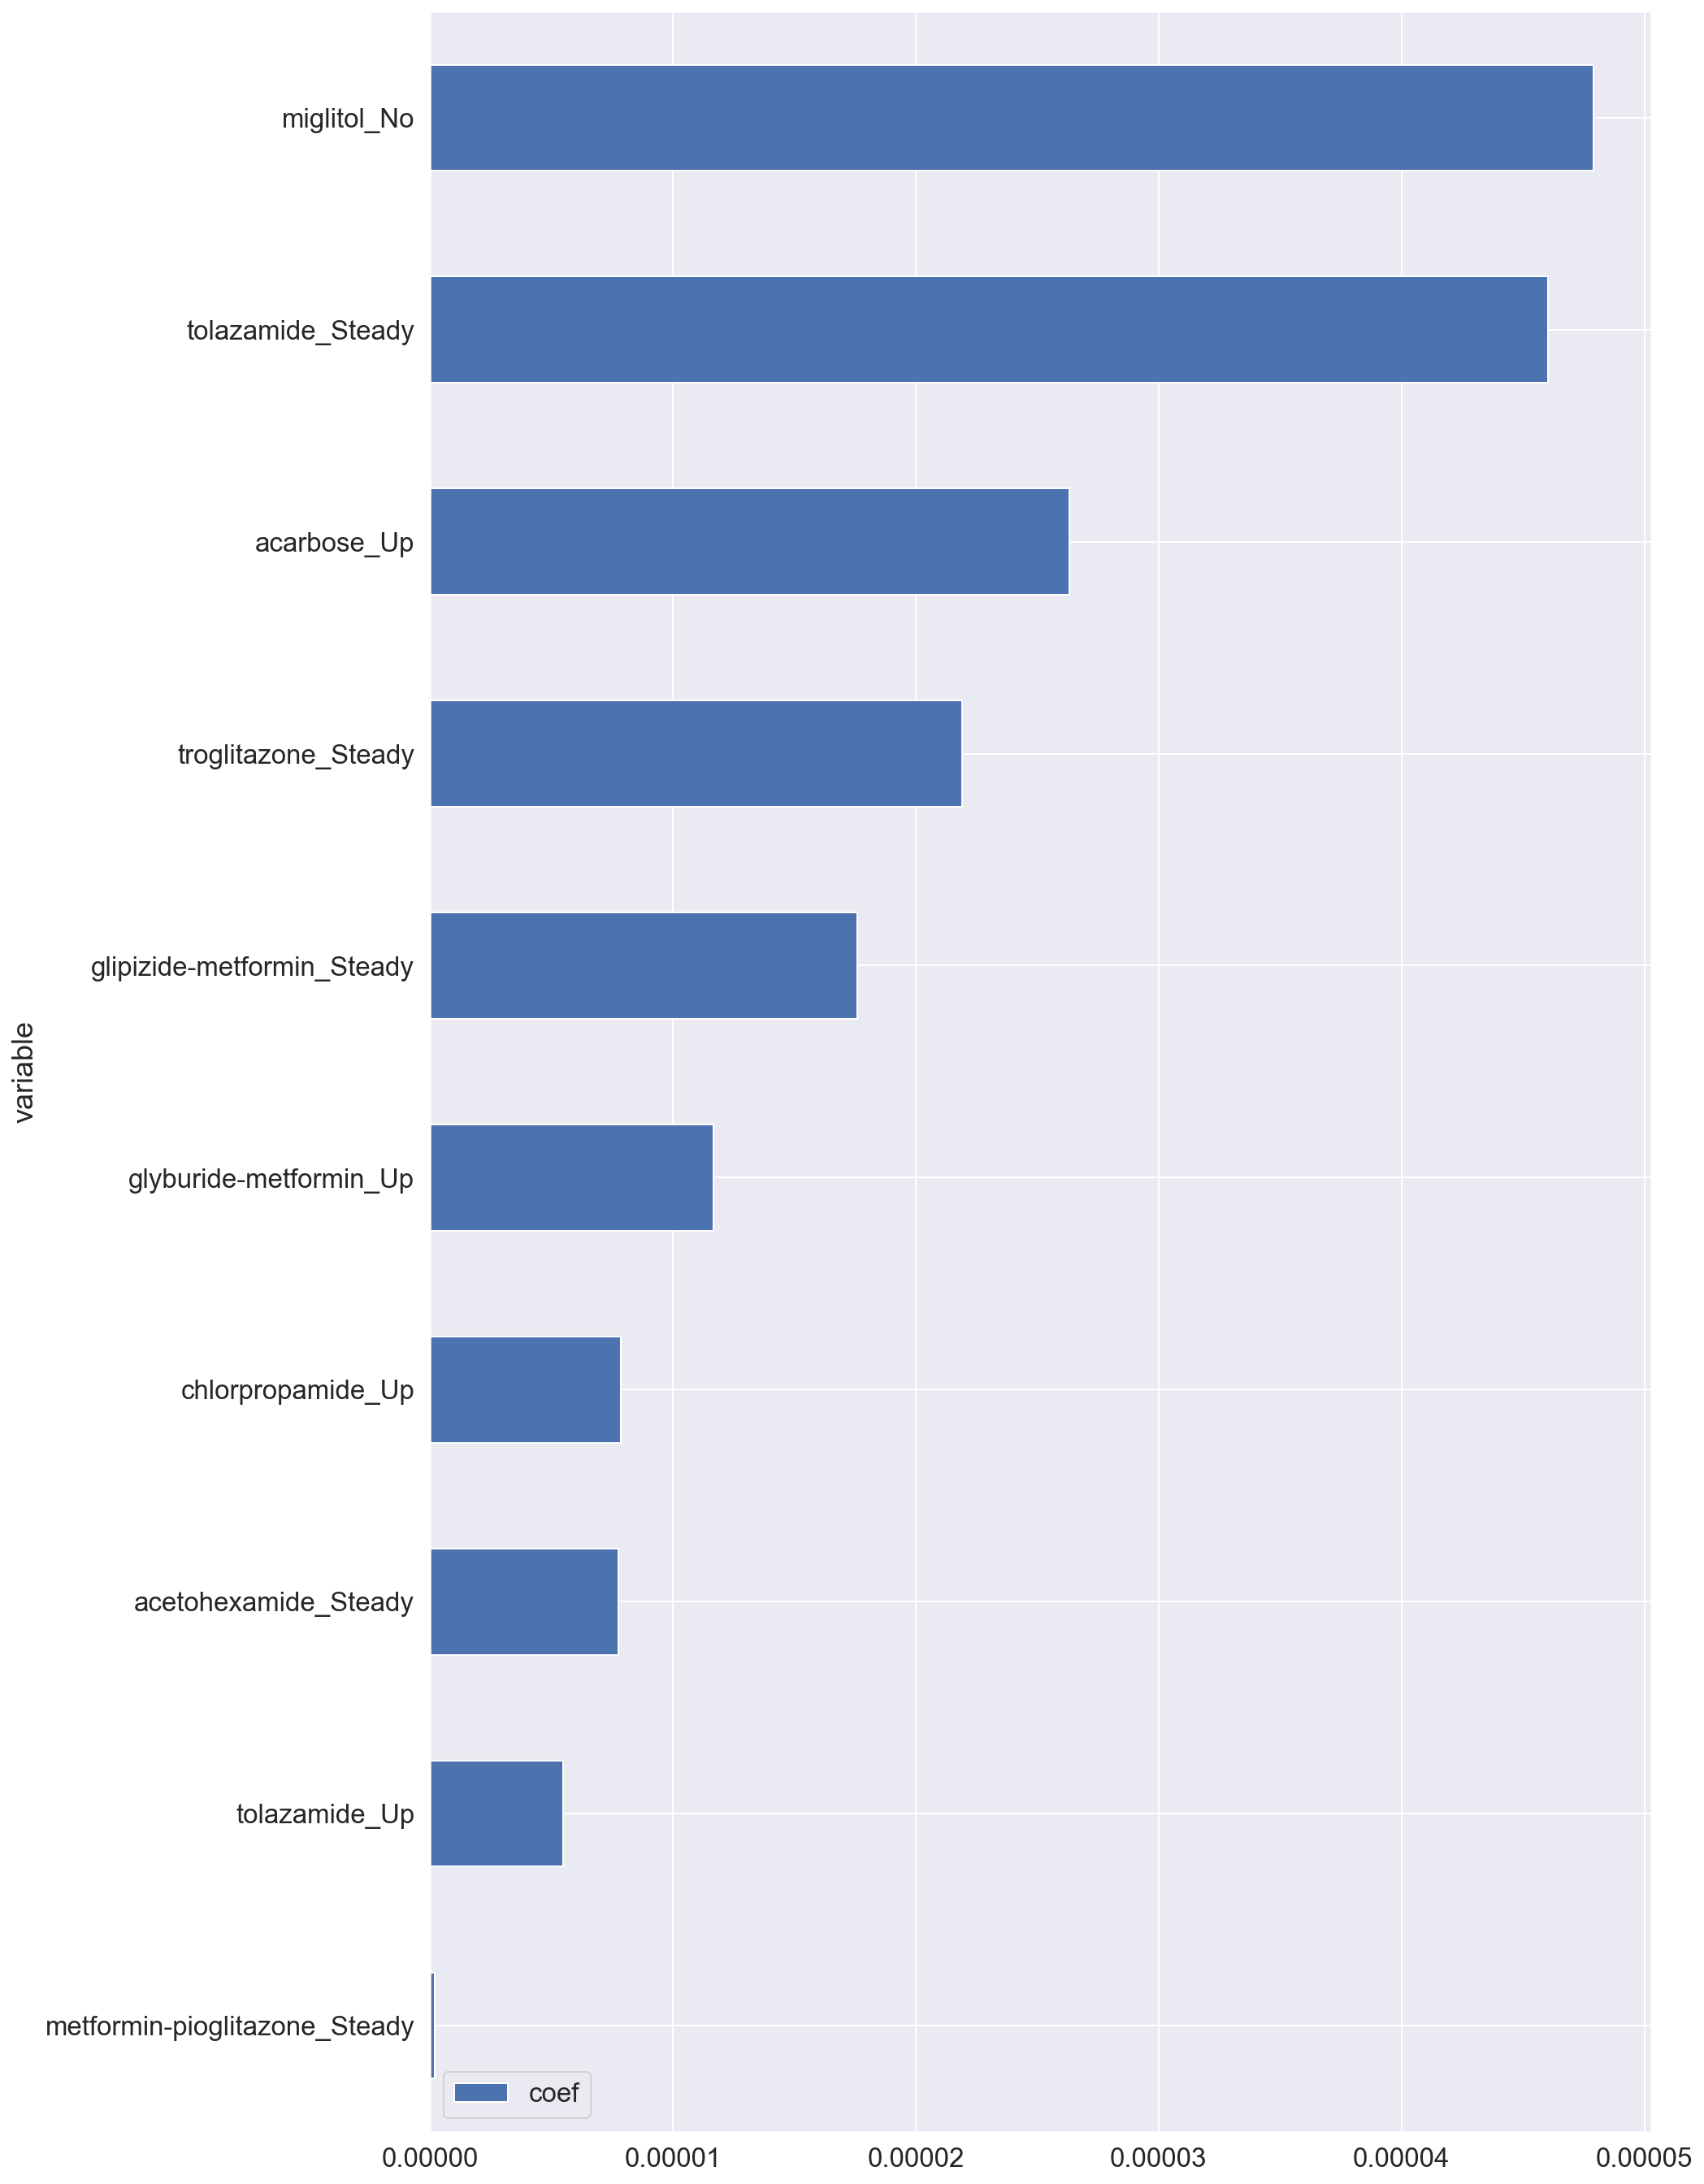

In [50]:
importanceDF_RFbase.sort_values(by='abs_coef', ascending=True).head(10).plot(kind='barh',  y='coef', x='variable',
                      color='b', figsize=(12, 24))
plt.show()

### Now trying Polynomial Regression to see if it performs better than SLR

In [118]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)
print(X_test_poly.shape)

(72764, 5564)
(13687, 5564)


In [119]:
modelLR_polynomial = LogisticRegression()
modelLR_polynomial.fit(X_train_poly,y_train)

LogisticRegression()

In [120]:
train_score_LR_polynomial_base = modelLR_polynomial.score(X_train_poly, y_train)
trainCV_score_LR_polynomial_base = cross_val_score(modelLR_polynomial, X_train_poly, y_train, cv =5).mean()
test_score_LR_polynomial_base = modelLR_polynomial.score(X_test_poly, y_test)

print("Polynomial LogisticRegression Score(Train): ", train_score_LR_polynomial_base)
print("Polynomial LogisticRegression Cross Val Score (Train): ", trainCV_score_LR_polynomial_base) 
print("Polynomial LogisticRegression Score (Test): ", test_score_LR_polynomial_base)

Polynomial LogisticRegression Score(Train):  0.6736023308229344
Polynomial LogisticRegression Cross Val Score (Train):  0.6417051546380848
Polynomial LogisticRegression Score (Test):  0.6105793818952291


### Running base models with selected features

In [32]:
fitted_classifiers_selected = baseModelFitting(base_classifiers, n_splits, X_train_sltd, X_test_sltd, y_train_sltd, y_test_sltd)

Classifier:  LogisticRegression()
 
Classification report
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      9096
           1       0.36      0.62      0.46      4591

    accuracy                           0.51     13687
   macro avg       0.53      0.53      0.50     13687
weighted avg       0.59      0.51      0.52     13687

 
Confusion Matrix
          Predicted_No  Predicted_Yes
True_No           4059           5037
True_Yes          1732           2859
-------------------------------------------
Classifier:  RandomForestClassifier()
 
Classification report
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      9096
           1       0.36      0.55      0.44      4591

    accuracy                           0.53     13687
   macro avg       0.53      0.53      0.51     13687
weighted avg       0.58      0.53      0.54     13687

 
Confusion Matrix
          Predicted_No  Predic

### Feature importance for selected features only

In [33]:
importance_RFbase_sltd = fitted_classifiers_selected['RF'].feature_importances_
                  
importance_RFbase_sltd = pd.DataFrame({'variable': X_train_sltd.columns,
                             'coef': importance_RFbase_sltd,
                             'abs_coef': np.abs(importance_RFbase_sltd), 
                            })
importance_RFbase_sltd.sort_values(by='abs_coef', ascending=False).head(40)

,variable,coef,abs_coef
31,A1Cresult_None,0.069426,0.069426
9,diag_2_Circulatory,0.049723,0.049723
15,diag_2_Neoplasms,0.048160,0.048160
6,diag_1_Neoplasms,0.043629,0.043629
28,max_glu_serum_None,0.043600,0.043600
0,diag_1_Circulatory,0.042943,0.042943
18,diag_3_Circulatory,0.042019,0.042019
24,diag_3_Neoplasms,0.041704,0.041704
30,A1Cresult_>8,0.041180,0.041180
19,diag_3_Diabetes,0.036372,0.036372


### Parameters for GridSearch

In [122]:
lr_params = {'C': np.logspace(-4, 4, 5),
             'penalty': ['l1', 'l2'],
             'solver': ['liblinear'],
             'class_weight':['balanced', None, 'auto'],
             'fit_intercept': [True, False]
            }

knn_params = {
                'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
             }

DT_classifier_params = {
                        'max_depth': list(range(1, 5))+[None], #How many nodes deep can the decision tree go?
                        'criterion' :['gini', 'entropy'], # for classification
                        'max_features': [None, 'auto'],# 'sqrt', 'log2'],   #Is there a cutoff to the number of features to use?
                        'max_leaf_nodes': list(range(4, 5)), #How many leaves can be generated per tree?
                        'min_samples_split': [2, 5, 10],#, 20, 30, 50], #How many samples need to be included at a node, at a minimum?    
                        'min_samples_leaf': [1, 2],#, 3,4] #How many samples need to be included at a leaf, at a minimum?                          
                        'class_weight':['balanced', None, 'auto'],  # if not using SMOTE etc to balance the class 
                        'ccp_alpha': [0, 0.001, 0.005, 0.01] #Associate a cost with the number of terminal nodes, for pruing, less alpha means larget cost
                       
                        }

Bagging_params = {'n_estimators': [10, 40]#, #, 100], 
                 # 'max_leaf_nodes':[10, 15]#, 
                 # 'max_depth':[4, 5, 6],
                 # 'max_samples':[5, 50],#[np.linspace(0.5, 1.0, 3)],# is the number of samples to draw from X to train each base estimator
                 # 'max_features':[5, 8],# [np.linspace(0.5, 1.0, 3)], #range(int(3/4.*X.shape[1]), X.shape[1]+1), # is the number of features to draw from X to train each base estimator, can be given as absolute number or fraction.
                  #'bootsrap':[True], # whether SAMPLES are drawn with replacement
                 # 'bootstrap_features':[True],  # whether FEATURES are drawn with replacement
                 # 'oob_score':[True], # Whether to use out-of-bag samples to estimate the generalization error
                 # 'warm_start':[False] #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble
                 }


RF_params = {
                'n_estimators': [10, 100, 200],
                'max_features': ['auto'],#, 'sqrt', 'log2', None],   #Is there a cutoff to the number of features to use?
                'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)], #How many nodes deep can the decision tree go?
                'criterion' :['gini', 'entropy'], # for classification
                'max_leaf_nodes': list(range(1, 12, 2))+[None]#, #How many leaves can be generated per tree?
                #  'min_samples_split': [2, 5, 10, 20, 30, 50], #How many samples need to be included at a node, at a minimum?    
                 # 'min_samples_leaf': [1, 2, 3,4],#How many samples need to be included at a leaf, at a minimum?                          
                 # 'class_weight':['balanced', None, 'auto'],  # if not using SMOTE etc to balance the class 
                 # 'ccp_alpha': [0, 0.001, 0.005, 0.01], #Associate a cost with the number of terminal nodes, for pruing, less alpha means larget cost
                 # 'max_samples': [5, 10, 20],
                 # 'bootstrap': [True, False],
                 # 'oob_score':[True]
                }


ada_params = {'n_estimators': [50, 100, 200, 500],
              'base_estimator' : [DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3),
                                  DecisionTreeClassifier(max_depth=4)]}

gb_params = {'n_estimators': [200, 500, 1000],
            'learning_rate': [0.02, 0.05],
            'max_depth': [1, 2],
            'min_samples_leaf': [5,10],
            'min_samples_split': [5,10]} 


SVM_params = { 'C': [0.1, 1, 10, 100, 1000],#[np.logspace(-5, 2, 5)]#,  # regularization parameter
               'gamma': [1e-3, 1e-4], #['auto']#,#'auto_deprecated', 'scale', ],
               'kernel': ['rbf','linear']# ,'poly','sigmoid', 'precomputed']#, 
              } 

grid_search_params = [lr_params
#, knn_params, SVM_params, DT_classifier_params, 
                #     ada_params, gb_params, Bagging_params
                    , RF_params]
#grid_search_params

In [123]:
def gridSearchModelFitting(classifiers, grid_search_params, n_splits, X_train, X_test, y_train, y_test):
        
        # Storing the best estimator from each classifier
        best_gs_classifiers = {}
        
        for classifier, grid_search_param in zip(base_classifiers, grid_search_params):
            
            # Note classifier[0] is name and classifier[1] is the model
            
            kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

            gridsearchedClassifier = GridSearchCV(estimator=classifier[1],
                                             param_grid=grid_search_param,
                                             cv=kf,
                                             scoring='accuracy',  
                                             n_jobs=-1,                                  
                                             verbose=0,
                                             return_train_score=True,
                                             refit=True
                                            )
        
            gridsearchedClassifier.fit(X_train, y_train)
        
            gs_cv_score = cross_val_score(gridsearchedClassifier, X_train, y_train, cv=kf).mean()
            gs_best_test_score = gridsearchedClassifier.best_estimator_.score(X_test, y_test)

            print('Classifier: ', classifier[0])
            print("model cross val score: %.3f" % gs_cv_score)
            print("model best score: %.3f" % gridsearchedClassifier.best_score_)
            print("model test score: %.3f" % gs_best_test_score)
            print("----------------------")
        
            best_gs_classifiers[classifier[0]] = {
                     'Best Estimator': gridsearchedClassifier.best_estimator_,
                     'Best Score': gridsearchedClassifier.best_score_,
                     'Best test score' : gs_best_test_score,
                     'Best params': gridsearchedClassifier.best_params_
                    }   
        
        return best_gs_classifiers
        

### Grid search on all features

In [ ]:
best_gs_classifiers = gridSearchModelFitting(base_classifiers, grid_search_params, n_splits, X_train, X_test, y_train, y_test)

### Gridsearch on selected features

In [ ]:
best_gs_classifiers_sltdFeatures = gridSearchModelFitting(base_classifiers, grid_search_params, n_splits, X_train_sltd, X_test_sltd, y_train_sltd, y_test_sltd)

### Printing Evaluation metrics only for the best model & features

In [53]:
# Classification report
print('Classification report')
predictions = fitted_classifiers['RF'].predict(X_test)
print(classification_report(y_test, predictions))
            
print(' ')
print('Confusion Matrix')
            
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions, labels=labels)
            
confusion_mat = pd.DataFrame(confusion_mat,
columns=['Predicted_No', 'Predicted_Yes'],
index=  ['True_No', 'True_Yes'])
            
print(confusion_mat)
            

Classification report
              precision    recall  f1-score   support

           0       0.70      0.89      0.79      9096
           1       0.54      0.26      0.35      4591

    accuracy                           0.68     13687
   macro avg       0.62      0.57      0.57     13687
weighted avg       0.65      0.68      0.64     13687

 
Confusion Matrix
          Predicted_No  Predicted_Yes
True_No           8084           1012
True_Yes          3408           1183


In [54]:
# For plotting ROC and Precision-Recall curves

import scikitplot as skplt

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

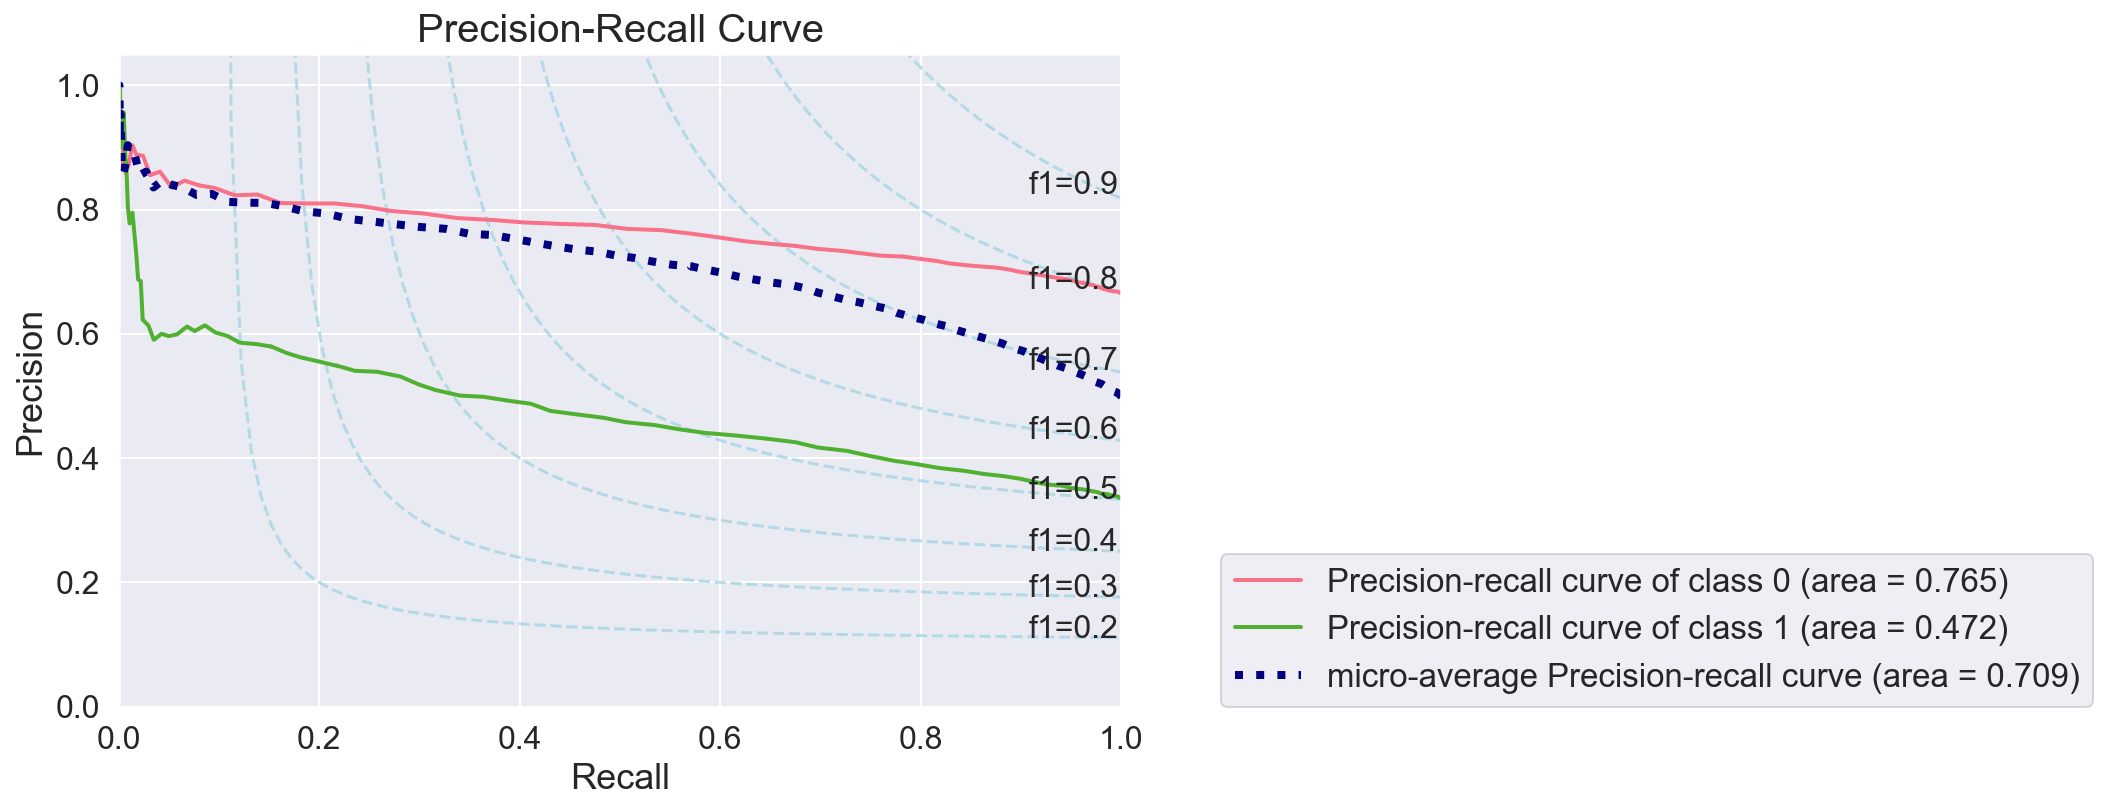

In [55]:
# Recall Precision plot

probabilities = fitted_classifiers['RF'].predict_proba(X_test)

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()


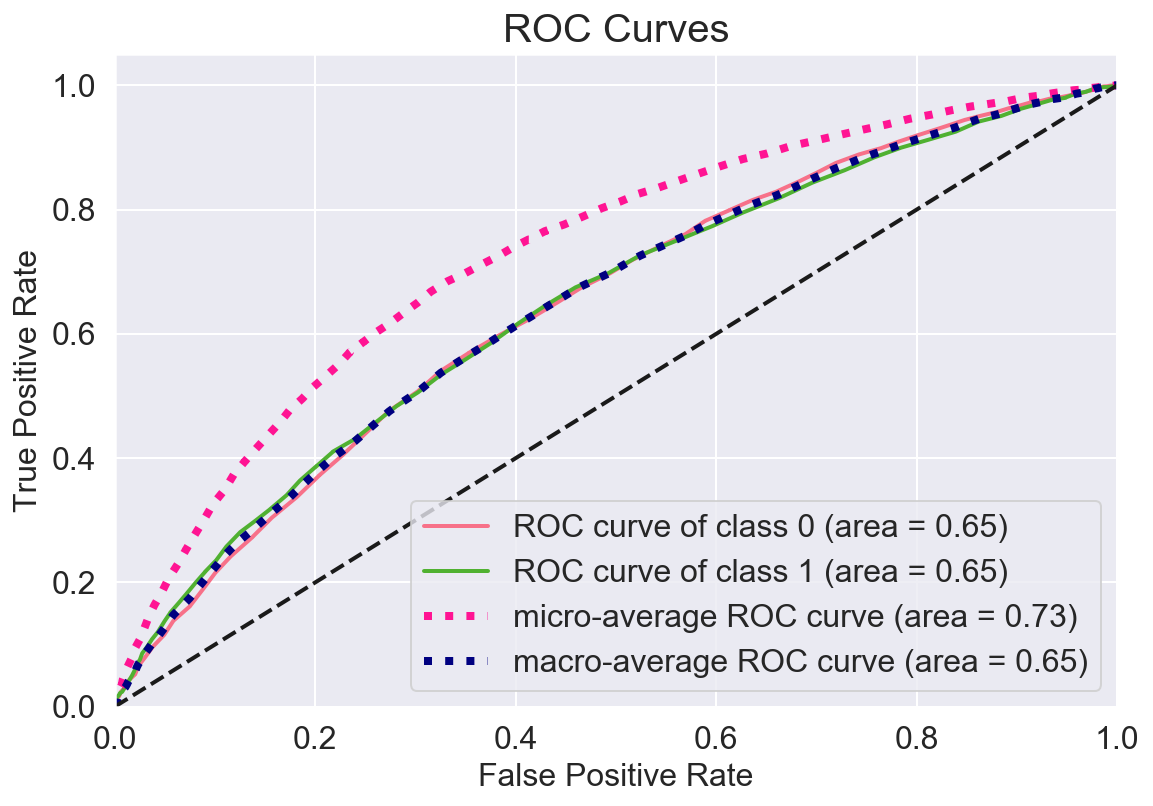

In [56]:
# AUC ROC plot

probabilities = fitted_classifiers['RF'].predict_proba(X_test)

skplt.metrics.plot_roc(y_test, probabilities, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()